In [1]:
import torch
from PIL import Image
import cv2
import numpy as np

/home/ivan/Documents/Code/opencv/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
torch.cuda.is_available()

True

In [4]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1650'

In [5]:
x = torch.randint(1, 100, (100, 100))

In [6]:
print(x.device)

cpu


In [9]:
res_cpu = x ** 2

In [10]:
x = x.to(torch.device('cuda'))

In [11]:
print(x.device)

cuda:0


In [12]:
res_gpu = x ** 2

In [14]:
torch.equal(res_cpu, res_gpu.cpu())

True

### TEST yolov5

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /home/ivan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-11-17 Python-3.8.10 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 3914MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [6]:
device = torch.device(0)
model.to(device)

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [2]:
for f in 'zidane.jpg', 'bus.jpg':
    torch.hub.download_url_to_file('https://ultralytics.com/images/' + f, f)  # download 2 images

100%|██████████| 165k/165k [00:00<00:00, 2.88MB/s]
100%|██████████| 476k/476k [00:00<00:00, 4.19MB/s]


In [3]:
im1 = Image.open("zidane.jpg")
im2 = cv2.imread('bus.jpg')[..., ::-1]

In [4]:
cv2.imshow("bus", im2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
results = model([im1, im2], size=640)
results.print()

image 1/2: 720x1280 2 persons, 2 ties
image 2/2: 1080x810 4 persons, 1 bus
Speed: 18.0ms pre-process, 13.7ms inference, 4.8ms NMS per image at shape (2, 3, 640, 640)


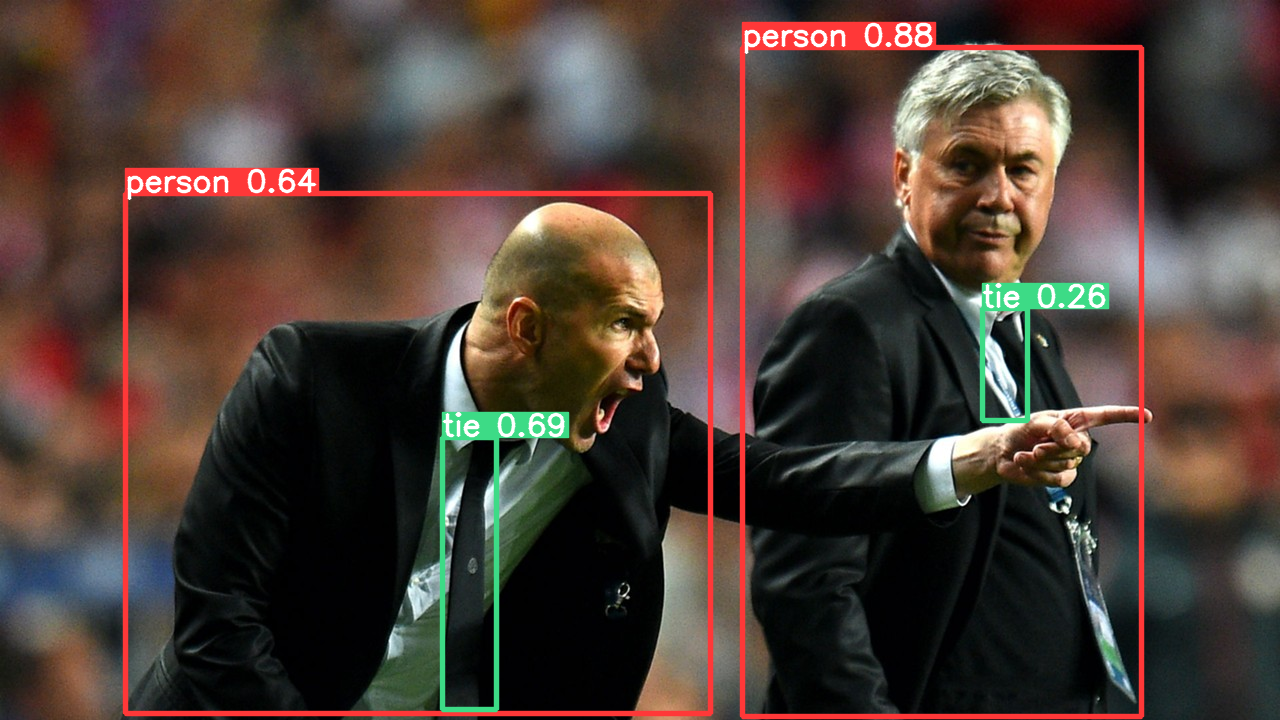

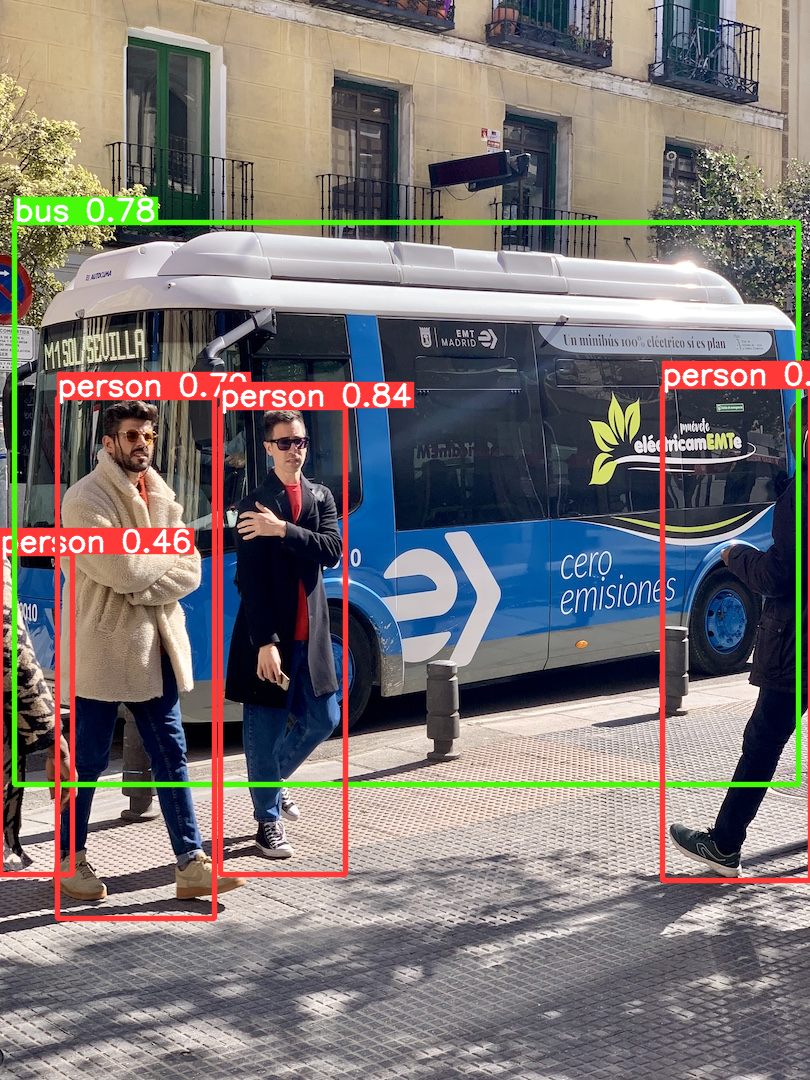

In [8]:
results.show()

In [9]:
model.cpu()

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [30]:
# model.cuda()
# model.cpu()

results = model([im1, im2], size=640)
results.print()

image 1/2: 720x1280 2 persons, 2 ties
image 2/2: 1080x810 4 persons, 1 bus
Speed: 6.3ms pre-process, 101.4ms inference, 1.9ms NMS per image at shape (2, 3, 640, 640)


### Test on the los_angeles.mp4

In [6]:
# cap = cv2.VideoCapture("los_angeles.mp4")

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', device='cuda:0')
# device = torch.device(0)
# model.to(device)

requirements: /home/ivan/Documents/Code/opencv/yolov5/requirements.txt not found, check failed.


Using cache found in /home/ivan/.cache/torch/hub/ultralytics_yolov5_master


Exception: [Errno 2] No such file or directory: '/home/ivan/Documents/Code/opencv/yolov5/utils/general.py'. Cache may be out of date, try `force_reload=True` or see https://github.com/ultralytics/yolov5/issues/36 for help.

In [7]:
while True:

    ret, frame = cap.read()

    if not ret:
        break

    results = model(frame, size=640)
    frame = np.array(results.render()[0])
    
    cv2.imshow("Frame", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()

In [23]:
results.render()[0]

array([[[215, 215, 229],
        [215, 215, 229],
        [215, 215, 229],
        ...,
        [198, 178, 175],
        [198, 178, 175],
        [198, 178, 175]],

       [[215, 215, 229],
        [215, 215, 229],
        [215, 215, 229],
        ...,
        [198, 178, 175],
        [198, 178, 175],
        [198, 178, 175]],

       [[215, 215, 229],
        [215, 215, 229],
        [215, 215, 229],
        ...,
        [198, 178, 175],
        [198, 178, 175],
        [198, 178, 175]],

       ...,

       [[ 89,  74,  70],
        [ 90,  75,  71],
        [ 92,  77,  73],
        ...,
        [ 73,  69,  72],
        [ 73,  69,  72],
        [ 73,  69,  72]],

       [[ 90,  75,  71],
        [ 90,  75,  71],
        [ 92,  77,  73],
        ...,
        [ 73,  69,  72],
        [ 74,  70,  73],
        [ 75,  71,  74]],

       [[ 90,  75,  71],
        [ 90,  75,  71],
        [ 92,  77,  73],
        ...,
        [ 74,  70,  73],
        [ 74,  70,  73],
        [ 74,  70,  73]]

### Load yolov5s

In [2]:
path = 'yolov5'
model = torch.hub.load(path, model='yolov5s', source='local')

YOLOv5 🚀 v6.2-249-gff6e6e3 Python-3.8.10 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 3914MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5m', device='cuda:0')

Using cache found in /home/ivan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-11-18 Python-3.8.10 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 3914MiB)

100%|██████████| 40.8M/40.8M [00:04<00:00, 9.98MB/s]

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients
Adding AutoShape... 
